In [ ]:
#ST1800-Trabajo2
#Universidad EAFIT
#2023-1

In [1]:
#importar librerias bases
import nltk
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
#Lectura de dataset y 
df = pd.read_csv("../text-mining/Datasets/twitterClimateData.csv",delimiter=";") 
df.head()

,Unnamed: 0,id,author_id,text,retweets,permalink,date,formatted_date,favorites,mentions,hashtags,geo,urls,search_hashtags,location
0,0,1.21181e+18,7.590000e+17,"2020 is the year we #votethemout, the year we ...",15,https://twitter.com/Sphiamia/status/1211807074...,2019-12-31 00:31:35+00:00,Tue Dec 31 00:31:35 +0000 2019,46,NaN,#votethemout #climatestrike #rebelforlife,NaN,NaN,#climatestrike,"California, USA"
1,1,1.21067e+18,2.219547e+07,Winter has not stopped this group of dedicated...,9,https://twitter.com/StephDujarric/status/12106...,2019-12-27 20:56:21+00:00,Fri Dec 27 20:56:21 +0000 2019,35,NaN,#climatefriday #climatestrike #ClimateAction,NaN,NaN,#climatestrike,"California, USA"
2,2,1.21059e+18,1.070000e+18,WEEK 55 of #ClimateStrike at the @UN. Next wee...,545,https://twitter.com/AlexandriaV2005/status/121...,2019-12-27 15:50:22+00:00,Fri Dec 27 15:50:22 +0000 2019,3283,@UN @Fridays4future,#ClimateStrike,NaN,NaN,#climatestrike,"California, USA"
3,3,1.21026e+18,1.339821e+09,"A year of resistance, as youth protests shaped...",1,https://twitter.com/EnergyHouseVA/status/12102...,2019-12-26 17:53:26+00:00,Thu Dec 26 17:53:26 +0000 2019,2,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,https://www.channelnewsasia.com/news/commentar...,#climatestrike,"California, USA"
4,4,1.20964e+18,1.339821e+09,HAPPY HOLIDAYS #greta #gretathunberg #climate...,1,https://twitter.com/EnergyHouseVA/status/12096...,2019-12-25 00:56:37+00:00,Wed Dec 25 00:56:37 +0000 2019,4,NaN,#greta #gretathunberg #climatechange #fridaysf...,NaN,"http://www.energyhouse.us,http://www.pacenowfo...",#climatestrike,"California, USA"


In [3]:
#Contar columnas originales
df.count()

Unnamed: 0         72405
id                 72405
author_id          72405
text               72405
retweets           72405
permalink          72405
date               72405
formatted_date     72405
favorites          72405
mentions           27554
hashtags           72402
geo                    0
urls               33349
search_hashtags    72405
location           72405
dtype: int64

In [4]:
# descarga de corpus nltk para 'tokenizer' y 'stopwords'
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\giovy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\giovy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [5]:
#selección de columna entrada text
df = df[['text']]
df.head()

In [6]:
df.head()

,text
0,"2020 is the year we #votethemout, the year we ..."
1,Winter has not stopped this group of dedicated...
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...
3,"A year of resistance, as youth protests shaped..."
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...


In [7]:
df['tokenized_text'] = df.apply(lambda row: nltk.word_tokenize(str(row['text'])), axis=1)
df['count_text'] = df.apply(lambda row: len(row['tokenized_text']), axis=1)
df.head()

,text,tokenized_text,count_text
0,"2020 is the year we #votethemout, the year we ...","[2020, is, the, year, we, #, votethemout, ,, t...",43
1,Winter has not stopped this group of dedicated...,"[Winter, has, not, stopped, this, group, of, d...",24
2,WEEK 55 of #ClimateStrike at the @UN. Next wee...,"[WEEK, 55, of, #, ClimateStrike, at, the, @, U...",65
3,"A year of resistance, as youth protests shaped...","[A, year, of, resistance, ,, as, youth, protes...",47
4,HAPPY HOLIDAYS #greta #gretathunberg #climate...,"[HAPPY, HOLIDAYS, #, greta, #, gretathunberg, ...",43


In [8]:
# Tokenize todo el contenido de 'text'
all_tokens_text = []
for t in df['tokenized_text']:
    all_tokens_text.extend(t)

In [9]:
print("all_tokens_title =",len(all_tokens_text))

all_tokens_title = 2332507


In [10]:
# analisis de frecuencia en palabras de 'text'
fdist_text = nltk.FreqDist(all_tokens_text)
print('Size BoW_title=',len(fdist_text))
topwordstext = fdist_text.most_common(20)
print('topwordstext=',topwordstext)

Size BoW_title= 116979
topwordstext= [('#', 290806), ('.', 63138), ('@', 61731), ('the', 53626), (',', 41414), ('to', 40665), ('of', 26667), ('and', 26352), ('!', 25286), (':', 21605), ('in', 21573), ('a', 21532), ('is', 19153), ('for', 18341), ('ClimateStrike', 17636), ('’', 17025), ('?', 16845), ('at', 16598), ('on', 13737), ('ClimateChange', 13325)]


In [11]:
# stopwords en nltk
from nltk.corpus import stopwords
 
stop_words_nltk = set(stopwords.words('english'))


Size of new BoW title = 78132


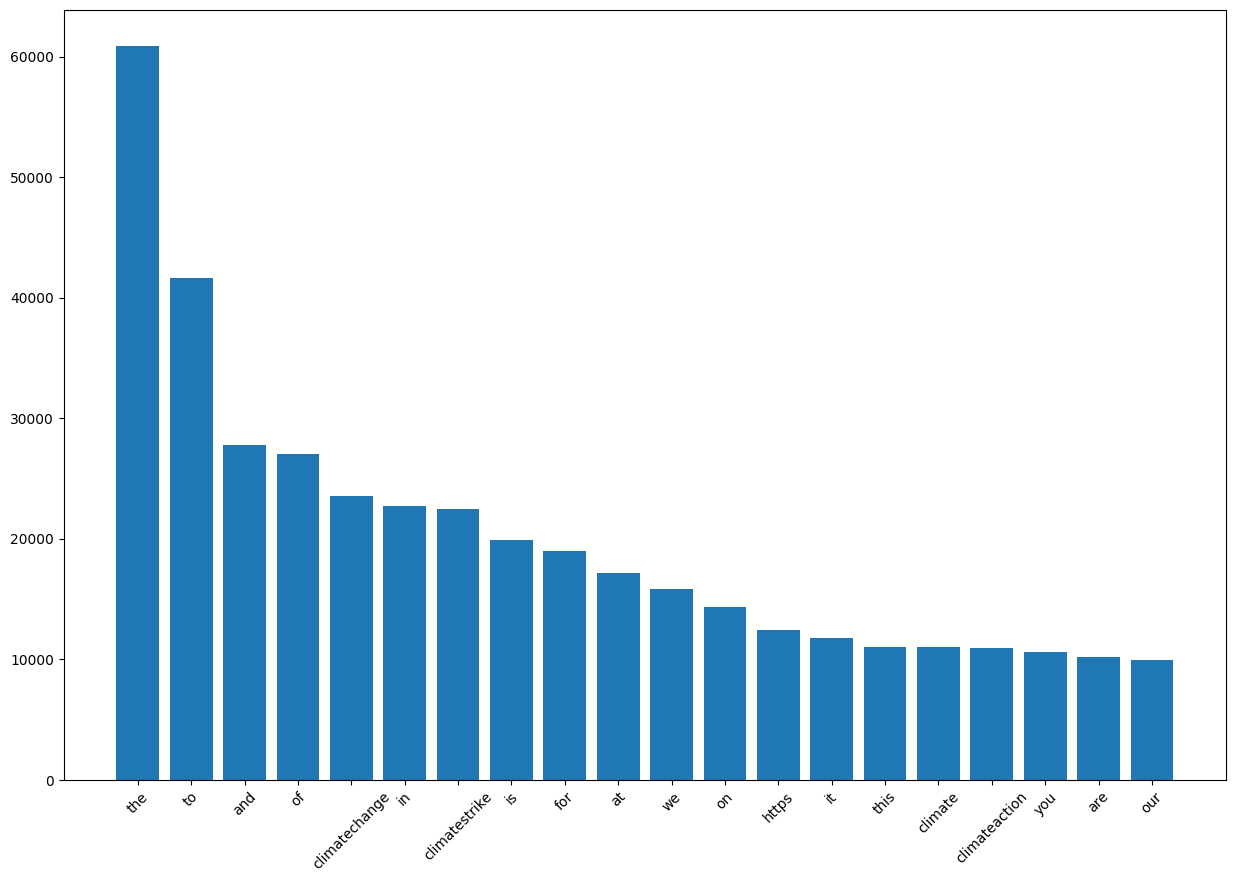

In [12]:
# algunas funciones de mejoras para la tokenización:
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in all_tokens_text]
tokens = [w.lower() for w in tokens if len(w)>1]
tokens = [w for w in tokens if w.isalpha()]
fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

Size of new BoW text = 94334


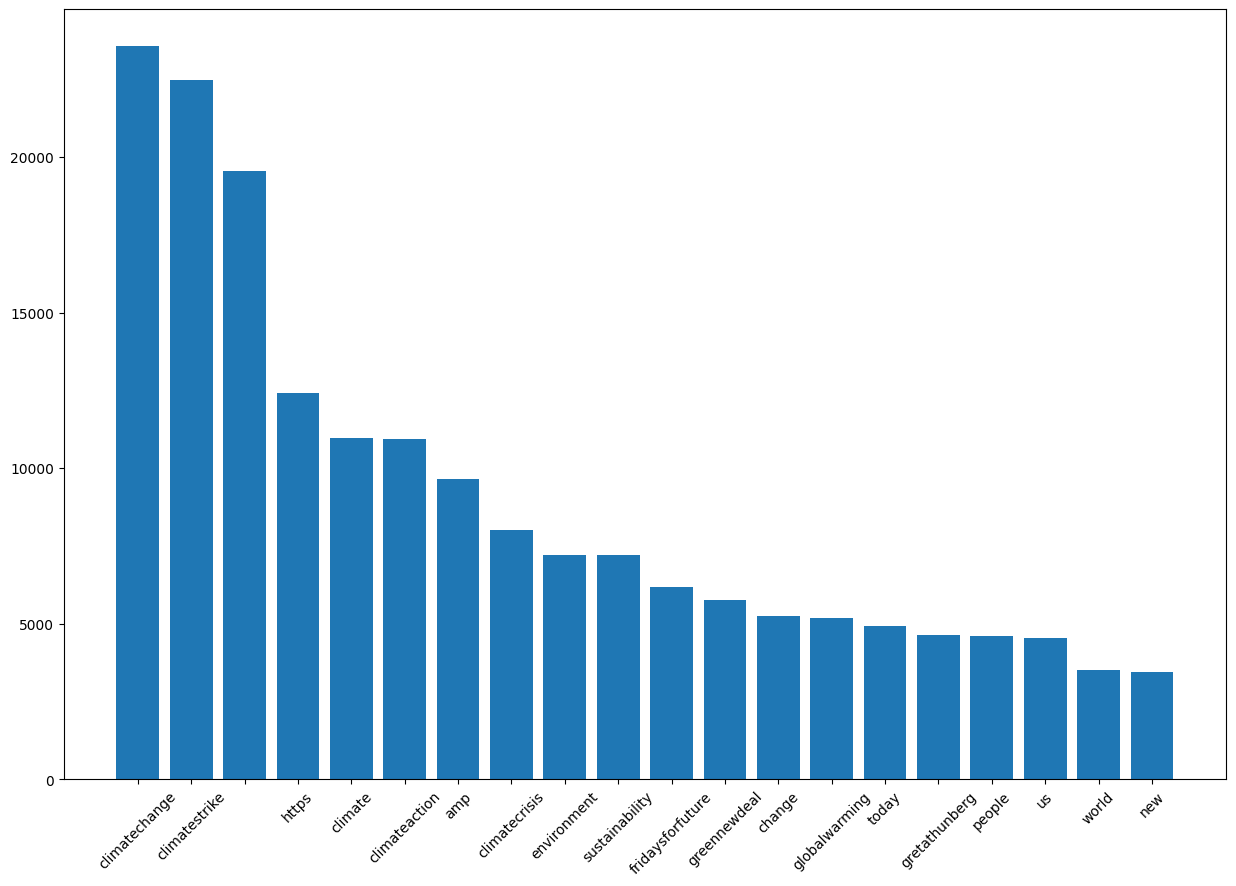

In [13]:
# TOKENIZAR con nltk, 
# ELIMINAR tokens de long = 1
# ELIMINAR caracteres que no sean alfanumericos
# REMOVER stop words
# graficar los 20 términos más frecuentes:

# ya tokenizado en all_tokens_text
tokens = [w.lower() for w in all_tokens_text if len(w)>1]
tokens = [re.sub(r'[^A-Za-z0-9]+','',w) for w in tokens]
tokens = [w for w in tokens if w not in stop_words_nltk]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW text =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

Size of new BoW title = 77409


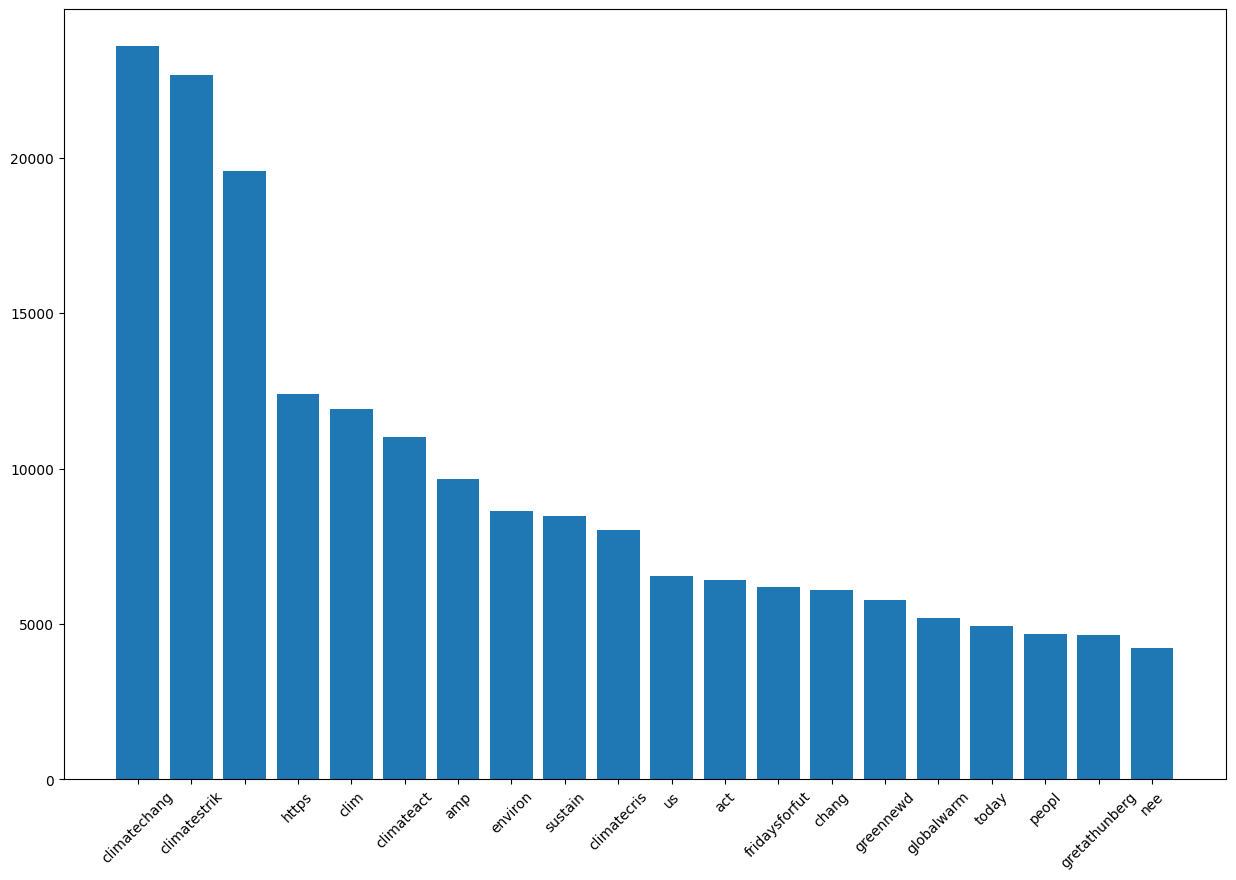

In [14]:
# Stemming con NLTK

from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter = PorterStemmer()
lancaster = LancasterStemmer()

#tokens = [porter.stem(w) for w in tokens]
tokens = [lancaster.stem(w) for w in tokens]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()

Size of new BoW title = 77182


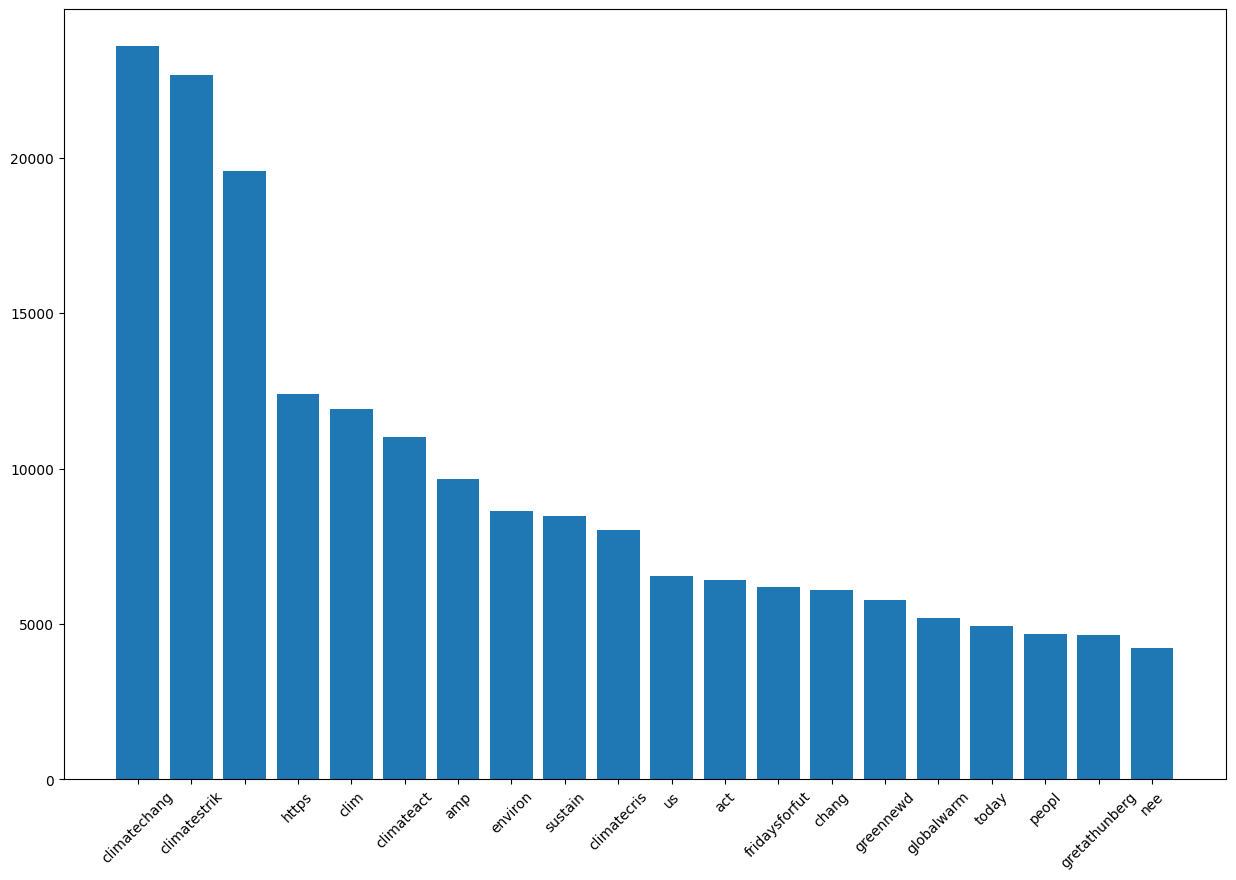

In [15]:
# Lemmatization con NLTK

from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

tokens = [wordnet_lemmatizer.lemmatize(w, pos="v") for w in tokens ]
#tokens = [wordnet_lemmatizer.lemmatize(w) for w in tokens ]

fdist = nltk.FreqDist(tokens)
topwords = fdist.most_common(20)
print('Size of new BoW title =',len(fdist))
x,y = zip(*topwords)
plt.figure(figsize=(15,10))
plt.bar(x,y)
plt.xticks(rotation=45)
plt.show()